In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def cleanData(sentences):
  sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
  # remove special characters
  sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
  # remove 1 letter words
  sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
  # lower all characters
  sentences = sentences.lower()
  return sentences

In [ ]:
import os
import sys
import pathlib
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

documentPos = []
documentNeg = []


for path in pathlib.Path("/content/drive/MyDrive/nlp2/pos").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        review = cleanData(str(current_file.read()))
        documentPos.append(review)
        current_file.close()

for path in pathlib.Path("/content/drive/MyDrive/nlp2/neg").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        review = cleanData(str(current_file.read()))
        documentNeg.append(review)
        current_file.close()



document = documentPos + documentNeg

df = pd.DataFrame( document , columns=['text'])

labelpos = [1]*1000
labelneg = [0]*1000
label = labelpos + labelneg

df['label'] = label

# print(df.head())

df


,text,label
0,films adapted from comic books have had plenty...,1
1,every now and then movie comes along from susp...,1
2,you ve got mail works alot better than it dese...,1
3,jaws is rare film that grabs your attention be...,1
4,moviemaking is lot like being the general mana...,1
...,...,...
1995,if anything stigmata should be taken as warnin...,0
1996,john boorman zardoz is goofy cinematic debacle...,0
1997,the kids in the hall are an acquired taste it ...,0
1998,there was time when john carpenter was great h...,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# settings that you use for count vectorizer will go here 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# # just send in all your docs here 
# tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(document)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorizer_vectors, y, test_size=0.33, random_state=42)

In [ ]:
print(X_test.shape)

In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# clf = svm.SVC(kernel='linear', C = 1.0 , max_iter=1500)

# clf.fit(X_train,y_train)
# pred = clf.predict(X_test)

# accuracy_svm = accuracy_score(y_test, pred)

# print('Accuracy: %.2f' % (accuracy_svm*100),'%') 

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


text_clf.fit(X_train, y_train)  


predictions = text_clf.predict(X_test)

print(metrics.accuracy_score(y_test,predictions))


0.8409090909090909


In [ ]:
text_clf['clf'].coef_[0][:10]

array([ 0.08623831,  0.00067443,  0.00742417,  0.10901635, -0.051393  ,
       -0.0256965 , -0.0256965 ,  0.45350374,  0.13317529, -0.03227555])

In [ ]:
text_clf.predict(['I enjoy the movie '])[0]

1

In [ ]:
text_clf.predict(['the movie disappointed but great'])[0]

1

In [ ]:
indexes = y_test.index.tolist()
len(indexes)

660

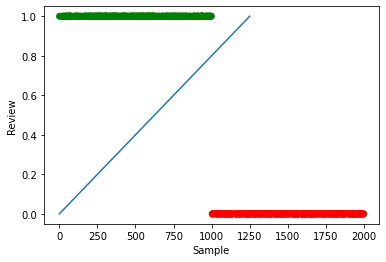

In [ ]:
plt.clf()
plt.xlabel("Sample")
plt.ylabel("Review")
color = y_test.apply(lambda x: 'green' if x == 1 else 'red')
plt.scatter(indexes, y_test , c=color)
X = [0,250,500,750,1000,1250]
Y = [0.0,0.2,0.4,0.6,0.8,1]
plt.plot(X,Y)
plt.show()

In [ ]:
indexes2 = df.index.tolist()

In [ ]:
text = input('Enter text to predict:')
res = text_clf.predict([text])[0]

if res == 0:
  print('This review is negative')
else:
  print('This review is postive')


Enter text to predict:the movie is good
This review is postive
